In [1]:
import torch
import torch.nn as nn
from torchtext.data.utils import get_tokenizer
import matplotlib.pyplot as plt

/usr/lib/python3/dist-packages/requests/__init__.py:89: RequestsDependencyWarning: urllib3 (1.26.9) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "


In [2]:
!wget "https://raw.githubusercontent.com/amephraim/nlp/master/texts/J.%20K.%20Rowling%20-%20Harry%20Potter%201%20-%20Sorcerer's%20Stone.txt"

--2022-04-11 10:50:58--  https://raw.githubusercontent.com/amephraim/nlp/master/texts/J.%20K.%20Rowling%20-%20Harry%20Potter%201%20-%20Sorcerer's%20Stone.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 439742 (429K) [text/plain]
Saving to: ‘J. K. Rowling - Harry Potter 1 - Sorcerer's Stone.txt.1’

J. K. Rowling - Har 100%[===================>] 429.44K  1.14MB/s    in 0.4s    

2022-04-11 10:50:59 (1.14 MB/s) - ‘J. K. Rowling - Harry Potter 1 - Sorcerer's Stone.txt.1’ saved [439742/439742]



In [2]:
def read_txt(txt_path):
  with open(txt_path, 'r') as f:
    txt_string = f.readlines()
  return txt_string

corpus_string = read_txt("J. K. Rowling - Harry Potter 1 - Sorcerer's Stone.txt")
corpus_string = "".join(corpus_string).replace('\n', ' ')

In [3]:
corpus_string[:100]

"Harry Potter and the Sorcerer's Stone   CHAPTER ONE  THE BOY WHO LIVED  Mr. and Mrs. Dursley, of num"

In [4]:
tokenizer = get_tokenizer('basic_english')

tokenizer(corpus_string)[:20]


from torchtext.vocab import build_vocab_from_iterator
vocab = build_vocab_from_iterator([tokenizer(corpus_string)])

In [5]:
from torchtext.vocab import build_vocab_from_iterator
vocab = build_vocab_from_iterator([tokenizer(corpus_string)], specials=['<unk>'])

In [6]:
sequence_of_words = tokenizer(corpus_string)[:20]
print(sequence_of_words)
vocab(sequence_of_words)

['harry', 'potter', 'and', 'the', 'sorcerer', "'", 's', 'stone', 'chapter', 'one', 'the', 'boy', 'who', 'lived', 'mr', '.', 'and', 'mrs', '.', 'dursley']


[9,
 126,
 5,
 3,
 615,
 4,
 14,
 158,
 599,
 48,
 3,
 150,
 76,
 1054,
 155,
 1,
 5,
 263,
 1,
 219]

In [9]:
# vocab size
len(vocab)

5959

In [41]:
sequence_of_words[0.0]

TypeError: list indices must be integers or slices, not float

In [18]:
word_emb = nn.Embedding(len(vocab), 4)

sentence_in_wrd_idx = vocab(sequence_of_words)
sentence_in_wrd_idx = torch.LongTensor(sentence_in_wrd_idx)

sentence_in_wrd_idx, word_emb(sentence_in_wrd_idx)

(tensor([   9,  126,    5,    3,  615,    4,   14,  158,  599,   48,    3,  150,
           76, 1054,  155,    1,    5,  263,    1,  219]),
 tensor([[-1.0232, -1.3768,  0.3820, -0.5251],
         [ 1.0945, -0.7239, -0.1121,  0.1413],
         [ 0.1122,  0.2340,  0.0132, -0.8617],
         [-1.0159,  2.4630,  0.9259,  0.8022],
         [-0.8881,  0.2692, -1.8334,  0.3312],
         [ 0.6817,  0.5533, -0.5790, -0.0400],
         [-0.1536, -0.7923,  2.3783,  0.9355],
         [ 0.9264, -0.9180,  2.0779, -0.5630],
         [ 0.2727,  0.6659, -2.9204, -0.6824],
         [ 0.4616, -1.1917, -1.8567, -0.9422],
         [-1.0159,  2.4630,  0.9259,  0.8022],
         [-0.5751, -0.1115,  0.2898, -0.4186],
         [-1.0399,  0.3751, -0.3849, -0.8031],
         [-1.8035, -2.1171, -0.4827, -2.9910],
         [-0.7295, -0.3977,  0.8822,  0.6182],
         [ 0.7147, -0.9582,  0.0986, -1.4691],
         [ 0.1122,  0.2340,  0.0132, -0.8617],
         [ 0.0645, -0.6192, -0.1381, -1.7604],
         [ 0.7

In [19]:
hidden_size = 3

weight_hh = nn.Linear(hidden_size, hidden_size)
weight_hx = nn.Linear(4, hidden_size)


In [21]:
initial_hidden = torch.zeros(hidden_size)
initial_hidden

tensor([0., 0., 0.])

In [27]:
input_seq = word_emb(sentence_in_wrd_idx)
input_seq.shape
hidden = torch.zeros(hidden_size)

total_hidden = [] 
for i in range(len(input_seq)):
  print(f'Current word is {sequence_of_words[i]}, and its embedding is {input_seq[i]}')
  hh_value = weight_hh(hidden)
  hx_value = weight_hx(input_seq[i])
  
  hhx_value = hh_value + hx_value
  hidden = torch.tanh(hhx_value)
  total_hidden.append(hidden)
  
#   hx_value = weight_hx()

Current word is harry, and its embedding is tensor([-1.0232, -1.3768,  0.3820, -0.5251], grad_fn=<SelectBackward0>)
Current word is potter, and its embedding is tensor([ 1.0945, -0.7239, -0.1121,  0.1413], grad_fn=<SelectBackward0>)
Current word is and, and its embedding is tensor([ 0.1122,  0.2340,  0.0132, -0.8617], grad_fn=<SelectBackward0>)
Current word is the, and its embedding is tensor([-1.0159,  2.4630,  0.9259,  0.8022], grad_fn=<SelectBackward0>)
Current word is sorcerer, and its embedding is tensor([-0.8881,  0.2692, -1.8334,  0.3312], grad_fn=<SelectBackward0>)
Current word is ', and its embedding is tensor([ 0.6817,  0.5533, -0.5790, -0.0400], grad_fn=<SelectBackward0>)
Current word is s, and its embedding is tensor([-0.1536, -0.7923,  2.3783,  0.9355], grad_fn=<SelectBackward0>)
Current word is stone, and its embedding is tensor([ 0.9264, -0.9180,  2.0779, -0.5630], grad_fn=<SelectBackward0>)
Current word is chapter, and its embedding is tensor([ 0.2727,  0.6659, -2.9204,

In [29]:
len(total_hidden)

total_hidden[0] # hidden state after we have read 0th word, harry

total_hidden[7] # hidden state after we have read until 7th word, harry potter and the socerer ' s stone

tensor([ 0.3305, -0.8447, -0.7648], grad_fn=<TanhBackward0>)

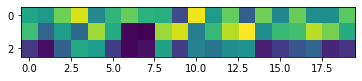

In [34]:
total_hidden_tensor = torch.stack(total_hidden)
total_hidden_tensor.shape

plt.imshow(total_hidden_tensor.detach().T)

In [38]:
hidden_to_vocab = nn.Linear(hidden_size, len(vocab))

vocab_logit = hidden_to_vocab(total_hidden_tensor)
vocab_prob = torch.softmax(vocab_logit, dim=-1)
vocab_prob

tensor([[1.8890e-04, 1.0490e-04, 3.2936e-04,  ..., 1.2484e-04, 1.2365e-04,
         1.0404e-04],
        [2.6241e-04, 1.2361e-04, 2.9889e-04,  ..., 1.2628e-04, 1.1300e-04,
         1.5770e-04],
        [1.8033e-04, 1.3745e-04, 2.5466e-04,  ..., 1.1655e-04, 1.1684e-04,
         1.1778e-04],
        ...,
        [1.3979e-04, 9.0500e-05, 3.1964e-04,  ..., 1.3082e-04, 1.3350e-04,
         6.8426e-05],
        [1.8460e-04, 8.8961e-05, 3.7239e-04,  ..., 1.2758e-04, 1.2671e-04,
         9.2438e-05],
        [2.0124e-04, 1.1976e-04, 3.0805e-04,  ..., 1.1527e-04, 1.1602e-04,
         1.2458e-04]], grad_fn=<SoftmaxBackward0>)

## New start from here

In [7]:
import torch
import torch.nn as nn
from torchtext.data.utils import get_tokenizer
import matplotlib.pyplot as plt
from torchtext.vocab import build_vocab_from_iterator


In [8]:
def read_txt(txt_path):
  with open(txt_path, 'r') as f:
    txt_string = f.readlines()
  return txt_string

tokenizer = get_tokenizer('basic_english')


In [9]:
class TextSet:
  def __init__(self, txt_path, batch_len=10):
    corpus_string = read_txt(txt_path)
    self.corpus_string = "".join(corpus_string).replace('\n', ' ')
    self.vocab = build_vocab_from_iterator([tokenizer(self.corpus_string)], specials=['<unk>'])
    self.corpus_in_word_tokens = tokenizer(self.corpus_string)
    self.corpus_in_idx_tokens = self.vocab(self.corpus_in_word_tokens)
    
    self.batch_len = batch_len
    self.batchify_corpus()
    
  def batchify_corpus(self):
    self.corpus_in_idx_tokens = self.corpus_in_idx_tokens[:len(self.corpus_in_idx_tokens)//self.batch_len*self.batch_len]
    self.batch_tensor = torch.LongTensor(self.corpus_in_idx_tokens)
    self.batch_tensor = self.batch_tensor.reshape(-1, self.batch_len)
    
  def __len__(self):
    return len(self.batch_tensor)
  
  def __getitem__(self, idx):
    return self.batch_tensor[idx]
  
dataset = TextSet("J. K. Rowling - Harry Potter 1 - Sorcerer's Stone.txt", batch_len=128)
dataset[2]

tensor([  12,   11,  834,    6,   39,    1,    3,  240, 2363,    6,  104,   34,
           3, 2993,  118,  168,   51,    3,  899,  598,   15,    3,  503,    1,
           3,  240,  195,   24,    3,  899,   22,    8,  362, 1074,    2,  130,
           2,   29,   23,   22,  100,  124,  230,   28,    1,   50,  150,   11,
         218,  152,  483,   37,  959,    3,  899,  180,   23,   63,    4,   18,
         171,   93, 2969,   32,    8, 2612,   67,   24,    1,   75,  155,    1,
           5,  263,    1,  219, 1014,   38,   25,    3, 2733,    2,  882, 2451,
         290,  912, 2404,    2,   41,   11,  224,   55,    3, 2633,  785,  324,
           6, 1944,   24,  486,    5, 1412,  228,  118,  726,   39, 1790,   33,
          80,    3, 1723,    1,  155,    1,  219, 2200,   27,    7,  641,   35,
          16,  376, 2036, 5664,   37,  401,    2,    5])

In [10]:
import torch.nn as nn

class LanguageModel(nn.Module):
  def __init__(self, vocab_size, hidden_size):
    super().__init__()
    
    self.word_encoder = nn.Embedding(vocab_size, hidden_size)
    self.rnn = nn.RNN(hidden_size, hidden_size, batch_first=True)
    self.word_prob_decoder = nn.Linear(hidden_size, vocab_size)

  def forward(self, x):
    word_vecs = self.word_encoder(x)
    hidden_states, _ = self.rnn(word_vecs)
    word_prob_logit = self.word_prob_decoder(hidden_states)
    word_prob = torch.softmax(word_prob_logit, dim=-1)
    return word_prob

In [15]:
from torch.utils.data import DataLoader

train_loader = DataLoader(dataset, batch_size=16, shuffle=True, num_workers=4)
model = LanguageModel(len(dataset.vocab), 64)

batch = next(iter(train_loader))
output = model(batch)
output.shape

torch.Size([16, 128, 5959])

In [23]:
num_epochs = 5

model.to('cuda')

for epoch in range(num_epochs):
  for batch in train_loader:
    out = model(batch.cuda())
    
    out_flatten = out.reshape(-1, out.shape[-1])
    true_word = batch[:, 1:]
    
    break
  break

In [22]:
out.shape, out_flatten.shape

(torch.Size([16, 128, 5959]), torch.Size([2048, 5959]))

In [25]:
batch

tensor([[1965,  139,  592,  ...,   22, 3163,   38],
        [   6, 3828,   20,  ...,  454,  143,    1],
        [  22,    6, 2116,  ...,  371,   12,  838],
        ...,
        [ 184,    2,   13,  ..., 4679,   27,   23],
        [  19,  816, 2891,  ...,   38,   15, 1026],
        [  39,  301,    3,  ...,    2,    9,  199]])

In [24]:
true_word

tensor([[ 139,  592,  485,  ...,   22, 3163,   38],
        [3828,   20,    7,  ...,  454,  143,    1],
        [   6, 2116,    9,  ...,  371,   12,  838],
        ...,
        [   2,   13,    4,  ..., 4679,   27,   23],
        [ 816, 2891,    1,  ...,   38,   15, 1026],
        [ 301,    3, 1548,  ...,    2,    9,  199]])

In [ ]:
import torch.nn as nn
class VanillaRNN(nn.Module):
  def __init__